# Działanie klasy
Notebook ma przedstawiać podstawowe działanie klasy do Character Embeddings bez dodatkowego objaśniania co tam się w środku dzieje.

## Importy
Tutaj zmieniamy path systemowy na katalog o jeden wyżej, by mieć dostęp do stworzonej klasy

In [1]:
%matplotlib inline 
import sys
sys.path.append("..")

from JanushPasswordGAN.CharacterEmbeddings import CharacterEmbeddings as CE
import logging

from random import randint

## Logi
Ustawiamy format wypisywania logów

In [2]:
logging.basicConfig(format='"%(asctime)s    %(message)s', level=logging.INFO)

## Załadowanie pliku haseł
Wczytujemy do tablicy plik z naszymi hasłami. Dodajemy również ważny limit jakim jest długość hasła wynosząca minimum 3 znaki.

Jeżeli nie chcemy ładować całego pliku również możemy to określić.

In [3]:
f = open("../polskie-slowa.txt", encoding="utf-8")
hasla = [line.replace("\n", "") for number, line in enumerate(f.readlines()) if len(line.replace("\n", "")) >= 3]
print(len(hasla))

13000


## Filtrowanie zbioru danych
Tutaj wybierzemy odpowiednią ilość haseł, żeby zmieściło nam się na raz do GPU i szybko przeliczyło 🐱‍👤

Funkcja wykonywana opcjonalnie

In [ ]:
haselka = []

while len(haselka) < 13000:
    randid = randint(0, len(hasla)-1)
    
    if hasla[randid] not in haselka:
        haselka.append(hasla[randid])
        
print(len(haselka))
print(haselka[:300])

## Przepisanie dużego zbioru na mały zbiór
Funkcja opcjonalna. Wykorzystywałem ją w przypadku, gdzie słownik źródłowy miał 200k+ słów, a chciałem jedynie korzystać np. z 13k.

In [ ]:
f2 = open("../polskie-slowa.txt", "w", encoding="utf-8")

for slowo in haselka:
    f2.write(slowo+"\n")
    
f2.close()

## Input

In [4]:
print(hasla[:200])

['harcowałabyś', 'groblowych', 'lonżowaliby', 'zasmagałabyś', 'zdradzań', 'niezamianowanej', 'transowych', 'nagonkowy', 'niezagubionych', 'karykaturką', 'wyhandlowałobyś', 'tessarotypie', 'niehermowi', 'dobiłobym', 'kantaty', 'siorpnijcie', 'rozlewanej', 'wciosałabym', 'równoczłonowego', 'jawię', 'stygmatoidalnej', 'niekaliskiej', 'wysiewach', 'niegodkowską', 'dystansowałobym', 'pokratkowane', 'nieetylujących', 'niedowąchaniem', 'siorbnęliście', 'majówkę', 'kontrujący', 'calówkę', 'niezbudowani', 'nieszkółkarską', 'falbaniaste', 'ogipsowałem', 'wykraczalibyśmy', 'niemikrosomalną', 'nieżółtkowego', 'zrywają', 'szatniarką', 'meteopaty', 'dosłużyłybyśmy', 'ampelografio', 'zlepianymi', 'okrętuję', 'niekonwentualną', 'baklavach', 'kreatywny', 'niebladnącego', 'przedkościelne', 'wiktymologami', 'adypinowe', 'odnawiałbym', 'siar', 'nieusiadań', 'usłaniom', 'doniczka', 'oblepiałem', 'szczypka', 'rzymiankę', 'pomieszkujące', 'tapicerować', 'metalurgów', 'plotowana', 'makaronizacyj', 'wzornikują

## Załadowanie klasy

In [5]:
ce = CE(hasla, learningrate=0.0001, epochs=4000, hiddenvectors=500, device="auto", printstep=1000, batchsize=None)

"2019-05-21 22:07:33,831    Witaj w Character Embeddings
"2019-05-21 22:07:33,831    CE: Wyszukiwanie unikalnych znaków...
"2019-05-21 22:07:33,837    CE: Budowanie one hot vectorów dla każego znaku...
"2019-05-21 22:07:33,838    CE: Tłumaczenie słów na one hot vectory...
"2019-05-21 22:07:34,138    CE: Wyznaczanie ID klas...
"2019-05-21 22:07:34,138    CE: Wyszukiwanie najdłuższego słowa...
"2019-05-21 22:07:34,141    CE: Obliczanie minimalnej wielkości okna...
"2019-05-21 22:07:34,145    CE: Tworzenie wejść i wyjść dla sieci...
"2019-05-21 22:07:57,672    CE: Wybieranie urządzenia...
"2019-05-21 22:07:57,844    CE: Witaj w CE - NN...
"2019-05-21 22:07:57,845    CE - NN: Zmiana wymiarów dla wektorów wejściowych...
"2019-05-21 22:07:57,845    CE - NN: Tłumaczenie wartości wyjściowych na klasy...
"2019-05-21 22:08:06,358    CE - NN: Posiadam 146602 próbek wejściowych
"2019-05-21 22:08:06,359    CE - NN: Budowanie modelu CBOW...
"2019-05-21 22:08:06,360    CE - NN: Ilość wejść: 924
"2019

## Wykres funkcji loss

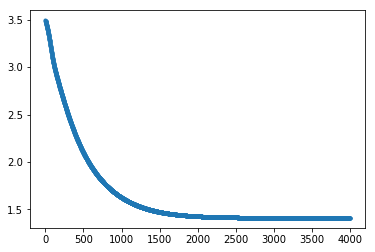

In [6]:
ce.wykresLoss()

## Sprawdzenie predykcji dla danego słowa

### Najpierw pobieramy wielkość okna

In [7]:
ce.jaka_dlugosc_slowa()

28
A tu emotka: 🈳


### A teraz budujemy nasze słowo do sprawdzenia
Chcemy sprawdzić co sieć zaproponuje między literki "kw" oraz "at". Zgodnie ze zbiorem uczącym powinno być "i".

Otrzymujemy w ten sposób słowo "kwiat" yay! ✌

In [8]:
slowo = "🈳🈳🈳🈳🈳🈳🈳🈳🈳🈳🈳🈳kwat🈳🈳🈳🈳🈳🈳🈳🈳🈳🈳🈳🈳"
print(len(slowo))
ce.test_word(slowo)

"2019-05-21 22:15:00,915    CE - NN: Witaj w trybie testowym...
"2019-05-21 22:15:00,916    CE - NN: Budowanie one hot vectora dla słowa testowego...
"2019-05-21 22:15:00,918    CE - NN: Budowanie tensora testowego, zmiana rozmiarów i wysyłanie do odpowiedniego urządzenia...
"2019-05-21 22:15:00,927    CE - NN: Wyłączanie gradientów...
"2019-05-21 22:15:00,928    CE - NN: Przeliczanie wartości...
"2019-05-21 22:15:00,931    CE - NN: Obliczanie CrossEntropyLoss dla każdej z klas...
"2019-05-21 22:15:00,946    CE - NN: Sortowanie prawdopodobieństw...


28
i 0.27170276641845703
e 2.5465822219848633
r 3.5514841079711914
ł 3.6692943572998047
l 3.9361701011657715
s 4.116141319274902
z 4.375383377075195
a 4.4896931648254395
p 4.824924468994141
n 4.844082832336426
k 5.161656379699707
y 5.3502349853515625
t 5.400690078735352
m 5.4378557205200195
u 5.620311737060547
c 5.906630516052246
w 6.163616180419922
o 6.92827033996582
d 7.993160247802734
j 8.242780685424805
b 8.381454467773438
g 8.80568790435791
ż 9.612462043762207
ę 10.389894485473633
f 12.257159233093262
h 13.909530639648438
ą 14.153414726257324
v 17.39669418334961
ó 19.237667083740234
ś 20.752622604370117
ź 25.71689796447754
ć 26.71058464050293
ń 31.00142478942871


## Wykres częstotliwości występowania liter

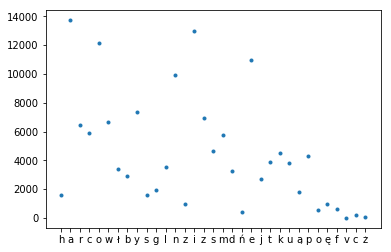

In [9]:
ce.wykres_czestosci_liter()

## Podobieństwo liter do podanej
Możemy tutaj wypisać jak podobne są do siebie dane litery.

W języku naturalnym przy wypisaniu podobieństwa dla samogłoski powinniśmy zauważyć wysokie prawdopodobieństwa właśnie dla innych samogłosek.

In [10]:
ce.print_similarity('e')

e oraz e:  0.9999998
e oraz o:  0.36348537
e oraz a:  0.35368356
e oraz y:  0.2224424
e oraz i:  0.21857262
e oraz ó:  0.16346729
e oraz u:  0.16163369
e oraz ą:  0.13636075
e oraz ę:  0.12740624
e oraz m:  -0.041185707
e oraz c:  -0.06701635
e oraz z:  -0.07319648
e oraz s:  -0.0823278
e oraz g:  -0.09314107
e oraz k:  -0.1118727
e oraz l:  -0.11301876
e oraz ś:  -0.115850665
e oraz h:  -0.12453741
e oraz b:  -0.14152877
e oraz n:  -0.14343229
e oraz ź:  -0.15775867
e oraz t:  -0.16176592
e oraz ć:  -0.1644385
e oraz d:  -0.16846375
e oraz v:  -0.16916047
e oraz f:  -0.17428207
e oraz j:  -0.18842052
e oraz r:  -0.1888903
e oraz ż:  -0.19583279
e oraz ł:  -0.19786507
e oraz ń:  -0.21765423
e oraz w:  -0.22681026
e oraz p:  -0.27788988


## Sprawdzenie czy wg. sieci podane słowo jest poprawne

In [11]:
ce.check_literowka("koccak", marginesbledu=4.7)

['p', 'n', 'r', 'z', 't', 'g', 's', 'd', 'h', 'k', 'w', 'm', 'l', 'ż', 'ł', 'j', 'b']
['a', 'o', 'ą', 'i', 'u', 'ę', 'ó']
['w', 'z', 'n', 's', 'p', 'r', 'i', 'd', 'l', 'b', 'j', 'm', 't']
['z', 'j', 'h', 'i', 't', 'k', 'c']
['e', 'y', 'o', 'i', 'ó', 'u', 'a', 'ą']
['ć', 'ł', 'm', 'ń', 'n', 'j', 'k', 'r', 'l', 'u']
Błędne słowo


In [12]:
ce.check_literowka("kociak", marginesbledu=4.7)

['p', 'n', 'r', 'g', 'd', 'm', 'z', 's', 'j', 'l', 'w', 't', 'ł', 'k', 'ż', 'h', 'b']
['a', 'ę', 'o', 'i', 'u', 'ą', 'r']
['w', 'n', 'p', 'm', 'l', 'b', 'c', 's']
['z', 'j', 'h', 'i', 't', 'k', 'c']
['e', 'o', 's', 'n', 'ł', 'a', 'ó', 'l', 'ą', 'u']
['m', 'ć', 'ń', 'ł', 'ż', 'n', 'h', 'k', 'l', 'r', 'j']

Słowo poprawne


In [13]:
ce.check_literowka("bydgoszcz", marginesbledu=4.7)

['b', 'r', 'w', 's', 'n', 'm', 'z', 't', 'p', 'c', 'ż', 'd']
['a', 'o', 'y', 'u', 'i', 'e', 'ó']
['z', 'r', 'l', 'j', 'd', 'm', 'n', 'b', 't', 'ł', 'o', 'w', 'u']
['ł', 'g', 'r', 'z', 'l', 'p', 'n', 'k', 'd', 'i']
['o', 'a', 'i', 'u', 'r', 'ę', 'e']
['s', 'r', 'c', 'd', 'w', 'i']
['i', 'z', 'a', 'ł', 'y', 'o', 't', 'e', 'u', 'ę', 'j', 'ą', 'k', 'p', 'c']
['c', 'o', 'e', 'i', 'y', 'a', 'ą', 's']
['y', 'e', 'i', 'h', 'a', 'ą', 'z', 'o', 'u', 'j']

Słowo poprawne


## Możemy zaobserwować reguły ortograficzne 😵

In [14]:
ce.check_literowka("kucyk", marginesbledu=4.7)

['s', 'm', 'p', 'z', 'l', 't', 'd', 'r', 'ł', 'k', 'b', 'w', 'n', 'ż', 'j', 'c']
['ą', 'a', 'i', 'o', 'r', 'u', 'ł', 'ę', 's']
['t', 'r', 'm', 'w', 'ł', 's', 'b', 'p', 'c', 'n', 'd']
['e', 'i', 'y', 'o', 'a', 'z', 'ą', 'ę', 'u']
['m', 'j', 'k', 'ł', 'w', 'n', 'ń', 'l', 'ć', 'o']

Słowo poprawne


In [15]:
ce.check_literowka("kócyk", marginesbledu=4.7)

['p', 'ż', 'r', 'm', 'g', 'ł', 'j', 'w', 'k', 't', 'n', 'd', 's', 'b', 'l']
['ą', 'a', 'i', 'o', 'r', 'u', 'ł', 'ę', 's']
['w', 'ł', 'r', 'b', 't', 'c']
['e', 'i', 'z', 'o', 'y', 'k', 'a', 'c', 'ą']
['m', 'ł', 'f', 'k', 'l', 'o', 'j', 'ń', 'n', 'w']
Błędne słowo


## Jeszcze inne słowa, których nie ma w zbiorze uczącym

In [28]:
ce.check_literowka("szczęście", marginesbledu=4.7)

['s', 'd', 'r', 'c', 'o', 'i']
['z', 'i', 'y', 'ł', 'a', 'o', 'u', 'ą', 'k', 'e', 'p', 'r']
['c', 'r', 'd', 'y', 'i', 'a', 's', 'o', 'u']
['z', 'i', 'k', 'j', 'h', 'l']
['y', 'e', 'ę', 'o', 'a', 'u', 'i', 'ą', 'j']
['ś', 'ź', 'ć', 'd', 'k', 'p', 's', 't', 'c', 'ż', 'ł']
['c', 'n', 'l']
['i']
['e', 'ę', 'ą', 'a', 'o', 'ł', 'u']

Słowo poprawne


In [29]:
ce.check_literowka("szczęścię", marginesbledu=4.7)

['s', 'c', 'r', 'd', 'o', 'i']
['z', 'i', 'ł', 'o', 'u', 'y', 'a', 'k', 'e', 'p', 't']
['c', 'r', 'd', 'y', 'i', 'a']
['z', 'i', 'h', 'k', 'j']
['y', 'e', 'ę', 'ą', 'o', 'a', 'i', 'u', 'j']
['ś', 'd', 'k', 'ź', 'p', 't']
['c', 'n', 'l', 'w']
['i']
['e', 'ę', 'ą', 'a', 'o', 'ł', 'u']

Słowo poprawne


In [30]:
ce.check_literowka("szczęściee", marginesbledu=4.7)

['s', 'r', 'd', 'c', 'o', 'i']
['z', 'i', 'y', 'ł', 'a', 'o', 'ą', 'u', 'k', 'e', 'p']
['c', 'r', 'd', 'y', 'i', 'a', 's']
['z', 'i', 'k', 'h', 'j']
['y', 'e', 'ę', 'o', 'a', 'u', 'i', 'ą', 'j']
['ć', 'ź', 'ś', 'd', 'p', 'k', 's', 't', 'ż', 'ł', 'c']
['c', 'n', 'l', 'w']
['i']
['n', 'ł', 'c', 'w', 'b', 'z', 'j', 'l', 's']
['m', 'ż', 'j', 'ł', 'ś', 'n', 'k', 'ń', 'i', 'w', 'z', 'l']
Błędne słowo


In [32]:
ce.check_literowka("herbata", marginesbledu=4.7)

['z', 'ż', 'f', 'n', 's', 't', 'd', 'w', 'i', 'p', 'g', 'b', 'l', 'c', 'h', 'm', 'j']
['a', 'o', 'u', 'e', 'i']
['r', 'm', 'o', 'u', 'z', 'd', 'ł', 'l', 'i', 'a', 'j']
['z', 'm', 'd', 'n', 'f', 'k', 'p', 't', 'u', 's', 'i', 'l', 'b', 'w', 'e', 'o', 'c']
['y', 'a', 'e', 'o', 'u', 'i', 's']
['ł', 'm', 'n', 't', 'k', 'l', 'g', 'r', 'w', 'j', 'd', 'c']
['y', 'ę', 'ą', 'a', 'e', 'o', 'u', 'i']

Słowo poprawne


In [34]:
ce.check_literowka("hhrbata", marginesbledu=4.7)

['c', 'a', 'o']
['a', 'o', 'u', 'e', 'i']
['o', 'a', 'u', 'i', 'ę', 'r', 'ł', 'y', 'm', 'e']
['z', 'm', 'u', 'f', 'i', 'w', 'd', 'k', 'l', 'p', 'o', 'a', 'e', 't', 'c', 'n', 'b', 'r']
['e', 'y', 'a', 'o', 'ę', 'i', 'u']
['ł', 't', 'n', 'm', 'k', 'l', 'g', 'w', 'r', 'j', 'c']
['ę', 'y', 'a', 'ą', 'e', 'o', 'u', 'i']
Błędne słowo


In [35]:
ce.check_literowka("ognisko", marginesbledu=4.7)

['o', 'u', 'e', 'a', 'z', 'l', 'i', 'r']
['d', 'b', 'l', 'g', 'r', 'w', 'm', 'k', 'p', 'ż', 't', 'z']
['l', 'n', 'o', 'm', 'w', 'e', 'r', 'a']
['i', 'a', 'ą', 'u', 'o', 'ę', 'y', 'e']
['e', 'ę', 's', 'a', 'c', 'o', 'ł']
['k', 't', 'z', 'ł', 'm', 'i', 'p']
['ą', 'i', 'a', 'ę', 'o', 'u']

Słowo poprawne


In [36]:
ce.check_literowka("ogiń", marginesbledu=4.7)

['o', 'd', 'u', 'a', 'r', 'e', 'n', 'z', 'ż', 'ł', 'b']
['w', 'l', 'm', 'b', 'p', 'c', 'k', 'd', 's', 'n']
['a', 'e', 'o', 'i']
['ą', 'e', 'ę', 'a', 'ć', 'u', 'm', 'o', 'ł']
Błędne słowo


In [38]:
ce.check_literowka("ogień", marginesbledu=4.8)

['z', 'u', 'd', 'o', 'r', 'a', 'e', 'ź', 'n', 'l', 'ł', 'b', 'w']
['n', 'b', 'w', 'p', 'd', 'm', 'c', 's', 'k', 'f', 'r', 'l', 'g']
['i', 'l', 'r', 'd', 'ł', 'w', 'n', 'z', 'ż', 'm']
['e', 'a', 'o', 'u']
['m', 'j', 'ż', 'ł', 'z', 'n', 'k', 'ń']

Słowo poprawne


In [39]:
ce.check_literowka("myszołów", marginesbledu=4.7)

['w', 'b', 'n', 't', 'd', 's', 'z', 'm', 'r', 'p', 'c', 'ł']
['u', 'a', 'i', 'o', 'y', 'r', 'b', 'e']
['c', 's', 'd', 'r', 'g']
['k', 't', 'z', 'p', 'i', 'n']
['a', 'k', 'y', 'i', 'o', 'u', 't', 'w', 'e', 's', 'p']
['r', 'n', 'ł', 'p', 'm', 'k', 'w', 'c', 'g', 'b', 't', 'l', 'd', 's', 'ż']
['o', 'ó', 'e', 'a', 'y']
['w', 'ł', 'ż', 'j', 'k', 'c']

Słowo poprawne


In [48]:
ce.check_literowka("maksymalizacja", marginesbledu=6)

['n', 'r', 's', 'p', 'w', 'z', 'i', 'd', 'b', 't', 'k', 'm']
['i', 'y', 'a', 'o', 'e', 'u']
['r', 'n', 'k', 'l', 'd', 'z', 'j', 'w', 's', 'h', 'b', 't', 'o', 'u']
['r', 't', 'n', 's', 'w', 'ł', 'c']
['z', 'y', 'o', 'u', 'a', 'e', 'i', 't']
['w', 'f', 'm', 't', 'k', 'c', 'p', 'n', 'j', 'b', 'l', 'd', 'r', 's']
['a', 'i', 'o', 'b', 'u', 'e', 'f', 'g', 'y', 'k', 'p']
['l', 'n', 'w', 'f', 'r', 'c', 'm', 'k', 't', 'g', 'b']
['i', 'c', 's', 'o', 'a', 'e', 'u', 'g', 'ą', 'n']
['t', 'z', 'k', 'n', 'f', 's', 'w', 'b', 'r', 'j', 'l', 'g', 'ż', 'm', 'c']
['a', 'y', 'i', 'e', 'o', 'u']
['c', 'u', 'z', 'b', 'i', 'w', 'a']
['i', 'k', 'j', 'h', 'm', 'c', 'n', 'w']
['ą', 'e', 'ó', 'o', 'u', 'm', 'a', 'k', 'i']

Słowo poprawne


In [49]:
ce.check_literowka("modernistyczny", marginesbledu=4.7)

['p', 'n', 'k', 'r', 'z', 'm']
['u', 'a', 'o', 'e', 'i']
['d', 'n', 'w', 'l', 'z', 'ż', 't', 'g', 's', 'm', 'f', 'i']
['e', 'o', 'a', 'y', 'u', 'ó']
['r', 'l', 'g', 'a', 'ś', 'z', 'k', 'o', 't', 'i', 'u', 'm', 'n', 'p', 'f']
['f', 'n', 'z', 'o', 'm', 'k', 'p', 'e', 'c', 'w', 'l', 'u', 'a', 's', 'b', 'g']
['y', 'i', 'a', 'e', 'o', 'u']
['e', 'a', 's', 'ę', 'o', 'u', 'z', 'k', 'ą', 'n']
['z', 't', 'ł']
['y', 'a', 'ę', 'o', 'e', 'ą', 'u']
['c', 'w', 's', 'r']
['z', 'i', 'j', 'a', 'h', 'e', 'o', 'y']
['n', 'm', 'w', 'c', 'ł']
['i', 'e', 'y', 'ą', 'o', 'a', 'ę', 'u']

Słowo poprawne
